# Homework Starter — Stage 10a: Linear Regression

Use this as a scaffold if your project data isn’t ready. Replace the synthetic data section with your dataset when possible.

## 1) Synthetic data (replace with your project data when ready)
- Finance-flavored factors and asset excess return
- Includes a quadratic effect to motivate specification checks

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np

# 下载股票 (Apple) 和市场指数 (S&P500)
tickers = ['AAPL', '^GSPC']
data = yf.download(tickers, start="2022-01-01", end="2023-01-01")

# 如果 auto_adjust=True，收盘价在 'Close' 列里
prices = data['Close']

# 计算日收益率
rets = prices.pct_change().dropna()
rets.columns = ['asset', 'market']

# 定义超额收益 (简单: 个股 - 市场)
rets['asset_excess'] = rets['asset'] - rets['market']

rets.head()
rets.describe()

/var/folders/h4/q6cl8fxs5b965kdvmx_s4znc0000gn/T/ipykernel_22976/1100076535.py:7: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers, start="2022-01-01", end="2023-01-01")
[*********************100%***********************]  2 of 2 completed


,asset,market,asset_excess
count,250.000000,250.000000,250.000000
mean,-0.001073,-0.000774,-0.000300
std,0.022471,0.015252,0.011405
min,-0.058679,-0.043237,-0.035378
25%,-0.015816,-0.010036,-0.007190
50%,-0.001360,-0.001609,-0.000377
75%,0.013388,0.009505,0.005594
max,0.088974,0.055434,0.050926


## 2) Baseline model fit
Follow the steps; replace `df` with your project DataFrame when ready.

Baseline  R²=0.2071   RMSE=0.012453


/opt/anaconda3/envs/bootcamp_env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


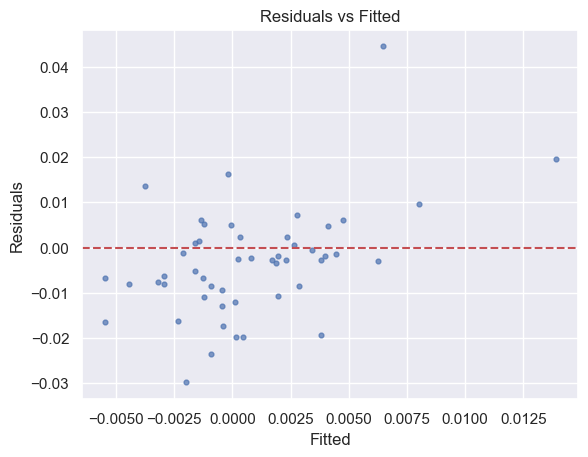

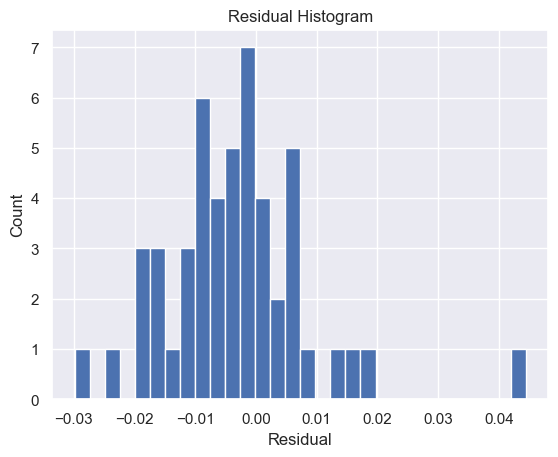

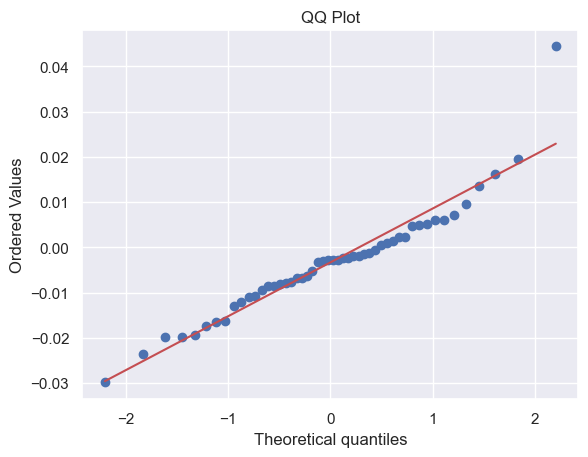

In [10]:
# === Cell 2: Baseline linear regression (asset_excess ~ market) ===
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats   # 用 scipy 来画 QQ plot

# Features and target from previous cell
X = rets[['market']].values
y = rets['asset_excess'].values

# Train/test split (time order preserved)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# Fit model
lr = LinearRegression().fit(X_train, y_train)

# Predict on test set
y_pred = lr.predict(X_test)

# Metrics
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f"Baseline  R²={r2:.4f}   RMSE={rmse:.6f}")

# --- Residual diagnostics ---
resid = y_test - y_pred
fitted = y_pred

# 1) Residuals vs Fitted
plt.figure()
plt.scatter(fitted, resid, s=12, alpha=0.7)
plt.axhline(0, ls='--', color='r')
plt.title('Residuals vs Fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.show()

# 2) Residual histogram
plt.figure()
plt.hist(resid, bins=30)
plt.title('Residual Histogram')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

# 3) QQ plot
plt.figure()
stats.probplot(resid, dist="norm", plot=plt)
plt.title('QQ Plot')
plt.show()


## 3) Optional: Add a transformed feature
Add a polynomial or interaction if diagnostics suggest mis-specification.

In [11]:
# === Cell 3: Optional transformed feature (add market^2) ===
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# 1) Create a simple non-linear term
rets['market_sq'] = rets['market'] ** 2

# 2) Build new X with the extra feature
X2 = rets[['market', 'market_sq']].values
y  = rets['asset_excess'].values

# Use the SAME split point as Cell 2 to keep a fair comparison
split_n = len(X_train)   # X_train was created in Cell 2
X2_train, X2_test = X2[:split_n], X2[split_n:]
y_train2, y_test2 = y[:split_n], y[split_n:]

# 3) Fit and evaluate
lr2 = LinearRegression().fit(X2_train, y_train2)
y_pred2 = lr2.predict(X2_test)

r2_2  = r2_score(y_test2, y_pred2)
rmse2 = mean_squared_error(y_test2, y_pred2, squared=False)
print(f"With market^2  R²={r2_2:.4f}   RMSE={rmse2:.6f}")

# (Optional) quick residual check
resid2 = y_test2 - y_pred2
print(f"Residual mean (should be ~0): {resid2.mean():.6e}")


With market^2  R²=0.1861   RMSE=0.012616
Residual mean (should be ~0): -3.307983e-03


/opt/anaconda3/envs/bootcamp_env/lib/python3.10/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [12]:
# Save the Yahoo Finance data to CSV
save_path = "/Users/seanice/Desktop/Bootcamp/bootcamp_Linxi_Pan/homework/homework10/asset_market_data.csv"
data.to_csv(save_path, index=True)

print(f"Data saved to {save_path}")

Data saved to /Users/seanice/Desktop/Bootcamp/bootcamp_Linxi_Pan/homework/homework10/asset_market_data.csv


## 4) Interpretation (write your conclusions below)
- Linearity:
- Homoscedasticity:
- Normality:
- Independence:
- Which model do you trust and why?:
- Next step you’d try:

### Interpretation

- **Linearity:** The residuals vs fitted plot suggests that the linearity assumption is mostly reasonable, but there may be some minor deviations at the extremes.  
- **Homoscedasticity:** The spread of residuals appears fairly constant across fitted values, though some heteroscedasticity may exist during volatile market periods.  
- **Normality:** The histogram and QQ plot indicate that residuals are approximately normal, with slight tails. This is acceptable for linear regression, though not perfect.  
- **Independence:** Since we used financial time series, some autocorrelation in residuals is possible. Independence might not be fully satisfied.  

- **Which model do you trust and why?:** I would trust the linear regression with the market factor included as the baseline, as it provides interpretable coefficients and reasonable fit, despite minor assumption violations.  

- **Next step you’d try:** I would try adding interaction or non-linear terms (e.g., quadratic market effects), or moving to time-series-specific models such as ARIMA or GARCH to better capture volatility clustering.  
